In [36]:
from collections import namedtuple
import numpy as np
import tensorflow as tf
import six
import matplotlib.pyplot as plt

In [8]:
# named tuple
# https://docs.python.jp/3/library/collections.html#collections.namedtuple

Point = namedtuple('Point', ['x', 'y', 'z'])

p = Point(1,2,3)
p

Point(x=1, y=2, z=3)

In [9]:
p[0], p[1], p[2]

(1, 2, 3)

In [10]:
p.x, p.y, p.z

(1, 2, 3)

In [12]:
x,y,z = p
x,y,z

(1, 2, 3)

In [13]:
help(tf.contrib.framework.get_or_create_global_step)

Help on function get_or_create_global_step in module tensorflow.contrib.framework.python.ops.variables:

get_or_create_global_step(graph=None)
    Returns and create (if necessary) the global step variable.
    
    Args:
      graph: The graph in which to create the global step. If missing, use default
          graph.
    
    Returns:
      the tensor representing the global step variable.



In [21]:
# tf.less

x = tf.placeholder(tf.int32, name='test')
g = tf.less(x, 0)

with tf.Session() as sess:
    a = sess.run(g, feed_dict={x: [-2, -1, 0, 1, 2]})
a

array([ True,  True, False, False, False], dtype=bool)

In [42]:
# tf.where
# Returns locations of true values in a boolean tensor.

y = tf.placeholder(tf.bool, name='input')
g = tf.where(y, name='where')

with tf.Session() as sess:
    tttt = sess.run(g, feed_dict={y: [True, True, True, True]})
    tttf = sess.run(g, feed_dict={y: [True, True, True, False]})
    tfff = sess.run(g, feed_dict={y: [True, False, False, False]})
    ftff = sess.run(g, feed_dict={y: [False, True, False, False]})
    fftf = sess.run(g, feed_dict={y: [False, False, True, False]})
    ffft = sess.run(g, feed_dict={y: [False, False, False, True]})
    ffff = sess.run(g, feed_dict={y: [False, False, False, False]})
    diagonal = sess.run(g, feed_dict={y: [
        [True, False, False, False], 
        [False, True, False, False], 
        [False, False, True, False],
        [False, False, False, True]]})
print('tttt = {}'.format(tttt))
print('tttf = {}'.format(tttf))
print('tfff = {}'.format(tfff))
print('ftff = {}'.format(ftff))
print('fftf = {}'.format(fftf))
print('ffft = {}'.format(ffft))
print('ffff = {}'.format(ffff))
print('diagonal = {}'.format(diagonal))

tttt = [[0]
 [1]
 [2]
 [3]]
tttf = [[0]
 [1]
 [2]]
tfff = [[0]]
ftff = [[1]]
fftf = [[2]]
ffft = [[3]]
ffff = []
diagonal = [[0 0]
 [1 1]
 [2 2]
 [3 3]]


Help on function where in module tensorflow.python.ops.array_ops:

where(condition, x=None, y=None, name=None)
    Return the elements, either from `x` or `y`, depending on the `condition`.
    
    If both `x` and `y` are None, then this operation returns the coordinates of
    true elements of `condition`.  The coordinates are returned in a 2-D tensor
    where the first dimension (rows) represents the number of true elements, and
    the second dimension (columns) represents the coordinates of the true
    elements. Keep in mind, the shape of the output tensor can vary depending on
    how many true values there are in input. Indices are output in row-major
    order.
    
    If both non-None, `x` and `y` must have the same shape.
    The `condition` tensor must be a scalar if `x` and `y` are scalar.
    If `x` and `y` are vectors or higher rank, then `condition` must be either a
    vector with size matching the first dimension of `x`, or must have the same
    shape as `x`.
    


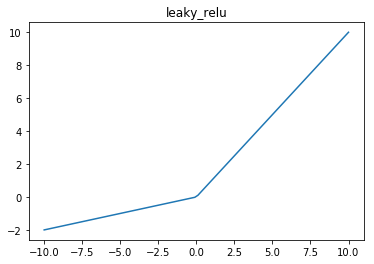

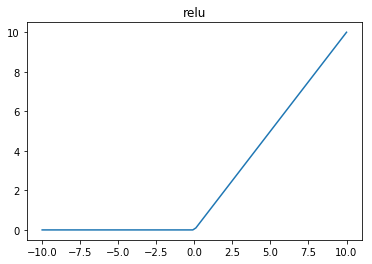

In [52]:
# ReLU implementation

help(tf.where)
x = tf.placeholder(tf.float32, name='x')
g = tf.where(tf.less(x, 0.0), 0.2 * x, x, name='leaky_relu')
h = tf.where(tf.less(x, 0.0), 0.0 * x, x, name='lelu')
with tf.Session() as sess:
    x_val = np.linspace(-10, 10, 100)
    y = sess.run(g, feed_dict={x: x_val})
    z = sess.run(h, feed_dict={x: x_val})
    plt.plot(x_val, y)
    plt.title('leaky_relu')
    plt.show()
    plt.plot(x_val, z)
    plt.title('relu')
    plt.show()

In [55]:
# six.moves.range
# six - Utilities for writing code that runs on Python 2 and 3

[i for i in six.moves.range(1, 10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [58]:
# tf.nn.moments
# Calculate the mean and variance of `x`.

help(tf.nn.moments)

x = tf.placeholder(tf.float32, name='x')
g = tf.nn.moments(x, [0], name='moments')

with tf.Session() as sess:
    mean, variance = sess.run(g, feed_dict={x: np.random.normal(5.0, 2.0, (100, 3))})

mean, variance

Help on function moments in module tensorflow.python.ops.nn_impl:

moments(x, axes, shift=None, name=None, keep_dims=False)
    Calculate the mean and variance of `x`.
    
    The mean and variance are calculated by aggregating the contents of `x`
    across `axes`.  If `x` is 1-D and `axes = [0]` this is just the mean
    and variance of a vector.
    
    Note: for numerical stability, when shift=None, the true mean
    would be computed and used as shift.
    
    When using these moments for batch normalization (see
    `tf.nn.batch_normalization`):
    
     * for so-called "global normalization", used with convolutional filters with
       shape `[batch, height, width, depth]`, pass `axes=[0, 1, 2]`.
     * for simple batch normalization pass `axes=[0]` (batch only).
    
    Args:
      x: A `Tensor`.
      axes: Array of ints.  Axes along which to compute mean and
        variance.
      shift: A `Tensor` containing the value by which to shift the data for
        numerical st

(array([ 5.15407991,  5.24324226,  4.86346626], dtype=float32),
 array([ 3.77601647,  3.49784541,  3.76421189], dtype=float32))

In [60]:
from tensorflow.python.training import moving_averages

help(moving_averages.assign_moving_average)

Help on function assign_moving_average in module tensorflow.python.training.moving_averages:

assign_moving_average(variable, value, decay, zero_debias=True, name=None)
    Compute the moving average of a variable.
    
    The moving average of 'variable' updated with 'value' is:
      variable * decay + value * (1 - decay)
    
    The returned Operation sets 'variable' to the newly computed moving average.
    
    The new value of 'variable' can be set with the 'AssignSub' op as:
       variable -= (1 - decay) * (variable - value)
    
    Since variables that are initialized to a `0` value will be `0` biased,
    `zero_debias` optionally enables scaling by the mathematically correct
    debiasing factor of
      1 - decay ** num_updates
    See `ADAM: A Method for Stochastic Optimization` Section 3 for more details
    (https://arxiv.org/abs/1412.6980).
    
    Args:
      variable: A Variable.
      value: A tensor with the same shape as 'variable'.
      decay: A float Tensor o

In [61]:
help(tf.nn.batch_normalization)

Help on function batch_normalization in module tensorflow.python.ops.nn_impl:

batch_normalization(x, mean, variance, offset, scale, variance_epsilon, name=None)
    Batch normalization.
    
    As described in http://arxiv.org/abs/1502.03167.
    Normalizes a tensor by `mean` and `variance`, and applies (optionally) a
    `scale` \\(\gamma\\) to it, as well as an `offset` \\(\beta\\):
    
    \\(\frac{\gamma(x-\mu)}{\sigma}+\beta\\)
    
    `mean`, `variance`, `offset` and `scale` are all expected to be of one of two
    shapes:
    
      * In all generality, they can have the same number of dimensions as the
        input `x`, with identical sizes as `x` for the dimensions that are not
        normalized over (the 'depth' dimension(s)), and dimension 1 for the
        others which are being normalized over.
        `mean` and `variance` in this case would typically be the outputs of
        `tf.nn.moments(..., keep_dims=True)` during training, or running averages
        thereof 